In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import time
from matplotlib import style
style.use('dark_background')
plt.rcParams.update({'lines.linewidth': 2,
                     'font.size': 24,
                     'font.family': 'serif',
                     'figure.figsize' : (16, 12),
                     'axes.grid': True})

%matplotlib inline

In [2]:
forwardProbs = np.linspace(.52,.90, 20)
NN = 300
kk = np.linspace(0, NN, NN+1, dtype=int)
minSuccessNumber = NN - (NN - 200) / 2

In [3]:
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction

def nCk(n, k): 
    return int( reduce(mul, (Fraction(n-i, i+1) for i in range(k)), 1) )

In [4]:
def binomialPDF(n, kvec, p):
    finalDist = np.zeros(np.shape(kvec))
    for ii, k in enumerate(kvec):
        finalDist[ii] = nCk(n, k) * p**k * (1.0-p)**(n-k)
    return finalDist
def binomialInvertedCDF(n, kvec, p):
    tempDist = binomialPDF(n, kvec, p)
    CDFDist = np.zeros(np.shape(tempDist))
    for ii, value in enumerate(tempDist):
        CDFDist[ii] = sum(tempDist[ii:-1]) # k greater than 
    return CDFDist

In [5]:
allDists = np.zeros( (len(forwardProbs), len(kk)) )
for ii, prob in enumerate(forwardProbs):
    allDists[ii] = binomialPDF(NN, kk, prob)
print NN, prob
print type(NN), type(prob)
print kk
print np.shape(allDists)

300 0.9
<type 'int'> <type 'numpy.float64'>
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

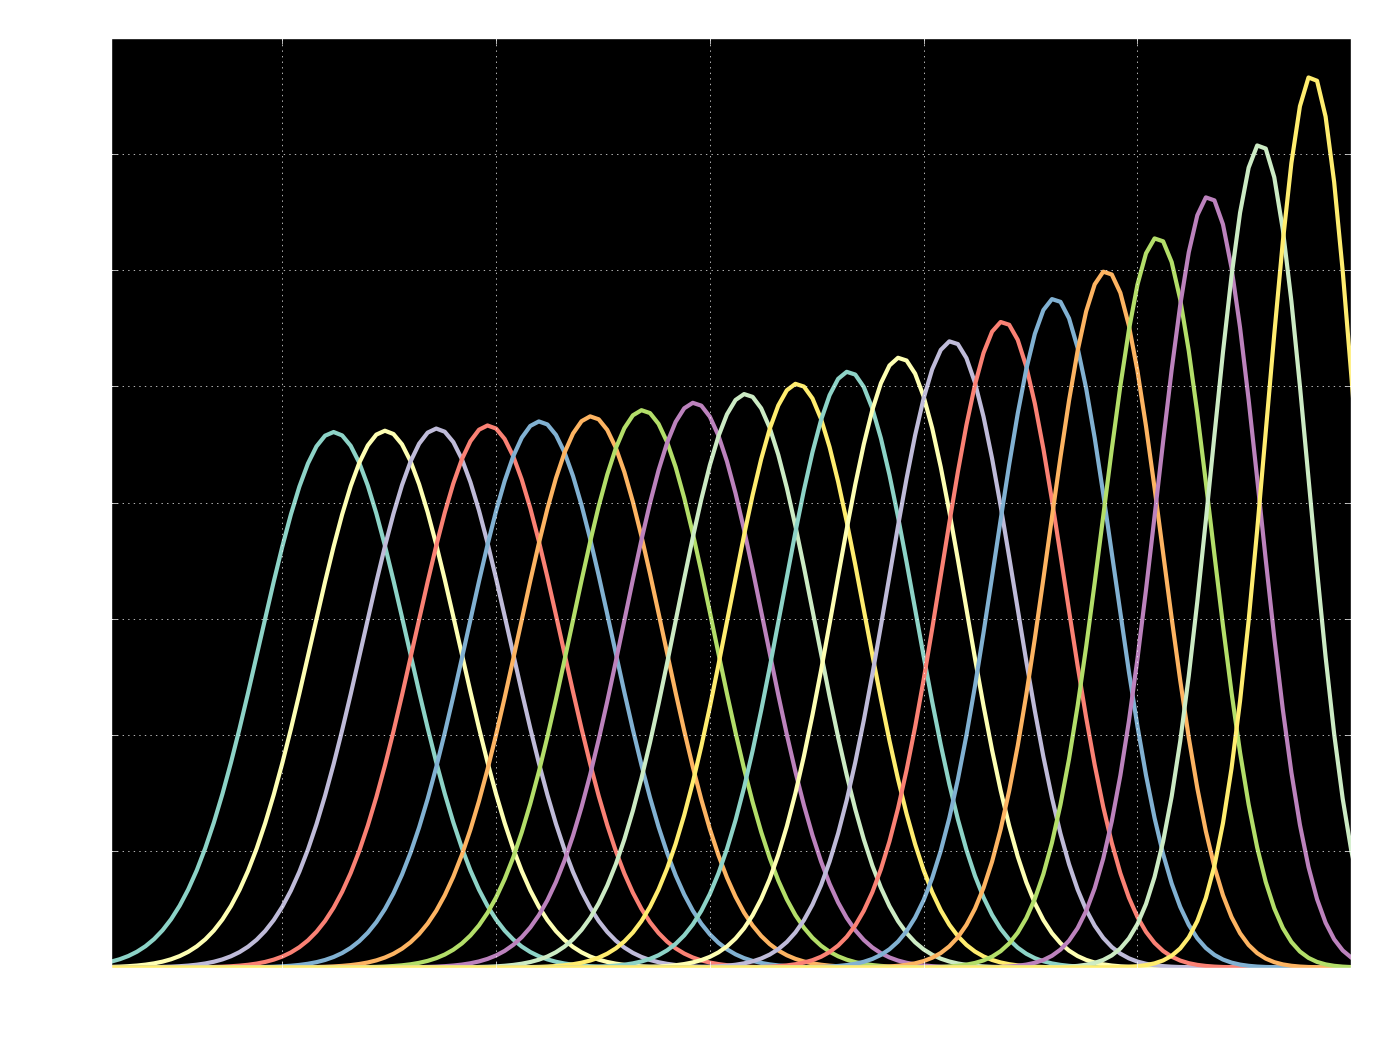

In [6]:
kkplot = np.array([2*xx - NN for xx in kk])  # kk - (NN - kk)
plt.figure(figsize=(16,12))
for ii, prob in enumerate(reversed(forwardProbs)):
    plt.plot(kkplot, allDists[ii], lw=3)
#     plt.fill(kkplot[minSuccessNumber:-1], allDists[ii][minSuccessNumber:-1])
plt.xlim([-40, 250])
# plt.ylim([0.0, 1.0])
plt.title('Horce Race Binomial Distributions --- 1.0 - CDF', fontsize=20)
plt.xlabel('Probability that the Horse has crossed $x$', fontsize=20)
plt.ylabel('1.0 - CDF of Binomial Distribution', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [7]:
index200 = np.where(kkplot >= 200)[0][0]
sum(allDists[0, :])

1.0000000000000002

In [8]:
start_time = time.time()
NNrange = [200, 302]
NNvec = range(NNrange[0], NNrange[1], 2)

probOfWinning = np.zeros( (len(forwardProbs), len(NNvec)) )
for ii, Nvalue in enumerate(NNvec):
    successNumber = Nvalue - (Nvalue - 200)/2
    print ii, Nvalue, successNumber
    for jj, prob in enumerate(forwardProbs):
        curDist = binomialPDF(Nvalue, [successNumber], prob)
        probOfWinning[jj, ii] = curDist[0]
print np.shape(probOfWinning)
print 'Runtime = '+ str(time.time() - start_time) +' seconds'

0 200 200
1 202 201
2 204 202
3 206 203
4 208 204
5 210 205
6 212 206
7 214 207
8 216 208
9 218 209
10 220 210
11 222 211
12 224 212
13 226 213
14 228 214
15 230 215
16 232 216
17 234 217
18 236 218
19 238 219
20 240 220
21 242 221
22 244 222
23 246 223
24 248 224
25 250 225
26 252 226
27 254 227
28 256 228
29 258 229
30 260 230
31 262 231
32 264 232
33 266 233
34 268 234
35 270 235
36 272 236
37 274 237
38 276 238
39 278 239
40 280 240
41 282 241
42 284 242
43 286 243
44 288 244
45 290 245
46 292 246
47 294 247
48 296 248
49 298 249
50 300 250
(20, 51)
Runtime = 2.54674601555 seconds


In [9]:
totalProbOfWinning = np.zeros( (len(forwardProbs), len(NNvec)) )
probRaceEnds = np.zeros( (len(NNvec), 1) )
for ii, Nvalue in enumerate(NNvec):
    probRaceEnds[ii] = sum(probOfWinning[:, ii]) + reduce(mul, probOfWinning[:, ii], 1) # probs are independent
    for jj, prob in enumerate(forwardProbs):
        totalProbOfWinning[jj, ii] = sum(probOfWinning[jj, 0:ii+1])
    
    print Nvalue, probRaceEnds[ii], totalProbOfWinning[:, ii]

200 [  7.13468159e-10] [  1.58733549e-57   3.01128572e-54   4.34115609e-51   4.84840301e-48
   4.26825224e-45   3.00841607e-42   1.72184795e-39   8.10563621e-37
   3.17528375e-34   1.04618383e-31   2.92751606e-29   7.02011047e-27
   1.45451584e-24   2.62373844e-22   4.14951557e-20   5.79122551e-18
   7.17558333e-16   7.93761899e-14   7.88014901e-12   7.05507911e-10]
202 [  1.29961770e-08] [  8.16195211e-56   1.54107967e-52   2.20412650e-49   2.43424740e-46
   2.11193121e-43   1.46182547e-40   8.18580288e-38   3.75524399e-35
   1.42745516e-32   4.54253019e-30   1.22145338e-27   2.79855300e-25
   5.50458612e-23   9.35709087e-21   1.38261859e-18   1.78457772e-16
   2.01984060e-14   2.00986863e-12   1.75973184e-10   1.35316417e-08]
204 [  1.20170422e-07] [  2.12926185e-54   4.00136637e-51   5.67777786e-48   6.20072500e-45
   5.30179074e-42   3.60386162e-39   1.97444548e-36   8.82693152e-34
   3.25587033e-31   1.00073195e-28   2.58578139e-26   5.66069794e-24
   1.05703805e-21   1.69331795e-

In [17]:
# Simulate the results
runningTotals = np.zeros( (len(forwardProbs), 1) )

counter = 0
while all(runningTotals[:,-1] < 200):
    tempTotal = np.zeros( (len(forwardProbs), 1) )
    
    for ii, prob in enumerate(forwardProbs):
        randomNumber = np.random.uniform(0.0, 1.0)
        if randomNumber < prob:
            tempTotal[ii] = runningTotals[ii, -1] + 1
        else:
            tempTotal[ii] = runningTotals[ii, -1] - 1
    
    runningTotals = np.hstack((runningTotals, tempTotal))
    counter += 1
print runningTotals

[[   0.   -1.    0. ...,   10.   11.   10.]
 [   0.   -1.   -2. ...,   32.   33.   32.]
 [   0.   -1.   -2. ...,   44.   43.   44.]
 ..., 
 [   0.    1.    2. ...,  164.  165.  166.]
 [   0.   -1.    0. ...,  178.  179.  180.]
 [   0.    1.    0. ...,  198.  199.  200.]]


In [21]:
print tempTotal
print runningTotals
print counter

[[  10.]
 [  32.]
 [  44.]
 [  64.]
 [  26.]
 [  68.]
 [  66.]
 [  70.]
 [  98.]
 [  98.]
 [ 106.]
 [ 106.]
 [ 116.]
 [ 148.]
 [ 146.]
 [ 170.]
 [ 158.]
 [ 166.]
 [ 180.]
 [ 200.]]
[[   0.   -1.    0. ...,   10.   11.   10.]
 [   0.   -1.   -2. ...,   32.   33.   32.]
 [   0.   -1.   -2. ...,   44.   43.   44.]
 ..., 
 [   0.    1.    2. ...,  164.  165.  166.]
 [   0.   -1.    0. ...,  178.  179.  180.]
 [   0.    1.    0. ...,  198.  199.  200.]]
248


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247


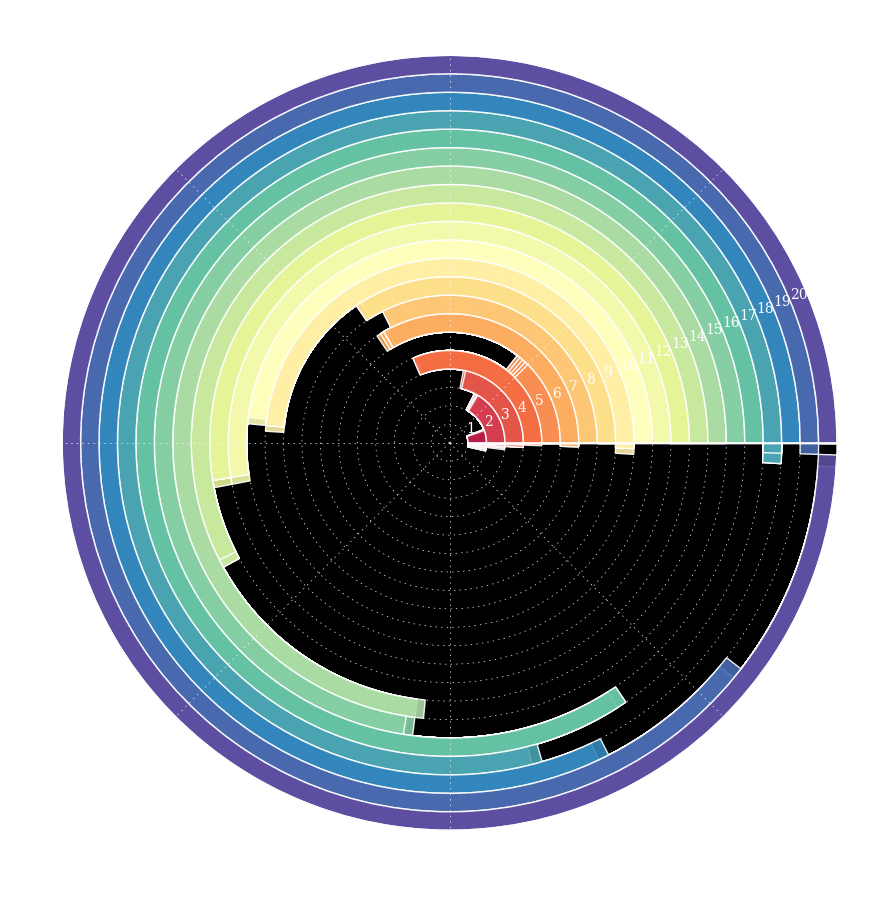

In [28]:
# Compute pie slices for each 
N = 20
theta = np.zeros(N)
radii = np.ones(N)
bottom = np.linspace(1.0, 20.0, N)
fig, axes = plt.subplots(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')
ax.set_ylim(0.0, 21.0)
ax.set_xlabel('Steps Forward')
ax.set_yticks(range(1,21,1))
ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
ax.set_xticklabels(['0', '25', '50', '75', '100', '125', '150', '175'])
    
start_time = time.time()
for ii in range(counter):
    
    width = 2*np.pi/200. * runningTotals[:,ii]
    bars = ax.bar(theta, radii, width=width, bottom=bottom)
    for b, bar in zip(bottom, bars):
        bar.set_facecolor(plt.cm.Spectral( b / 20.0))
        bar.set_alpha(0.9)
    plt.savefig('./HorseRaceFigs/HorseRaceRadar_'+ str(ii) +'.png')
    print str(ii)+' of '+ str(counter) +'  Time So Far '+ str(time.time() - start_time) +' seconds'
# plt.show()

In [40]:
# Simulate the results
# runningTotals = np.zeros( (len(forwardProbs), 1) )

simulationNumber = 100000
winnerTracker = np.zeros(20)

start_time = time.time()
for jj in range(simulationNumber):
    if np.mod(jj, 100) == 0:
        print 'Simulation Number = '+ str(jj)
    counter = 0
    tempTotal = np.zeros( (len(forwardProbs), 1) )
    while all(tempTotal < 200):   
        for ii, prob in enumerate(forwardProbs):
            randomNumber = np.random.uniform(0.0, 1.0)
            if randomNumber < prob:
                tempTotal[ii] += 1
            else:
                tempTotal[ii] -= 1
        counter += 1
    for ii, prob in enumerate(forwardProbs):
        if tempTotal[ii] == 200:
            winnerTracker[ii] += 1
#             print 'Winner = Horse '+ str(ii + 1)
print winnerTracker
print 'Total Simulation Time = ' + str(time.time() - start_time) +' seconds'
# print runningTotals

Simulation Number = 0
Simulation Number = 100
Simulation Number = 200
Simulation Number = 300
Simulation Number = 400
Simulation Number = 500
Simulation Number = 600
Simulation Number = 700
Simulation Number = 800
Simulation Number = 900
Simulation Number = 1000
Simulation Number = 1100
Simulation Number = 1200
Simulation Number = 1300
Simulation Number = 1400
Simulation Number = 1500
Simulation Number = 1600
Simulation Number = 1700
Simulation Number = 1800
Simulation Number = 1900
Simulation Number = 2000
Simulation Number = 2100
Simulation Number = 2200
Simulation Number = 2300
Simulation Number = 2400
Simulation Number = 2500
Simulation Number = 2600
Simulation Number = 2700
Simulation Number = 2800
Simulation Number = 2900
Simulation Number = 3000
Simulation Number = 3100
Simulation Number = 3200
Simulation Number = 3300
Simulation Number = 3400
Simulation Number = 3500
Simulation Number = 3600
Simulation Number = 3700
Simulation Number = 3800
Simulation Number = 3900
Simulation N

In [37]:
print 100/100
print np.mod(1021,100)

1
21
